### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### Importing data set and wrangling it

In [3]:
# Define path

path = r"C:\Users\caden\OneDrive\Desktop\Open Source Data Final Project"

In [4]:
# Import Data Set

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'Merged.csv'), index_col = False)

In [5]:
# Rename columns 

df.rename(columns = {'Happiness Rank' : 'Rank', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, inplace = True)

In [6]:
df.head()

,Year,Country,Rank,Score,Economy,Social Support,Health,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2015,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,2015,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,2015,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,2015,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


In [9]:
# Removing categorical/unnecessary columns

df = df.drop(columns = ['Year', 'Country', 'Rank'])

In [10]:
df.head()

,Score,Economy,Social Support,Health,Freedom,Trust,Generosity,Dystopia Residual
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


In [15]:
df.shape

(1230, 8)

In [21]:
df = df.dropna()

In [22]:
df.describe

<bound method NDFrame.describe of       Score  Economy  Social Support  Health  Freedom  Trust  Generosity  \
0     7.587    1.397           1.350   0.941    0.666  0.420       0.297   
1     7.561    1.302           1.402   0.948    0.629  0.141       0.436   
2     7.527    1.325           1.361   0.875    0.649  0.484       0.341   
3     7.522    1.459           1.331   0.885    0.670  0.365       0.347   
4     7.427    1.326           1.323   0.906    0.633  0.330       0.458   
...     ...      ...             ...     ...      ...    ...         ...   
1225  3.471    1.503           0.815   0.280    0.571  0.102       0.012   
1226  3.268    0.785           0.133   0.462    0.621  0.544       0.187   
1227  2.995    0.947           0.690   0.270    0.329  0.105       0.106   
1228  2.955    1.392           0.498   0.631    0.103  0.034       0.082   
1229  2.404    0.758           0.000   0.289    0.000  0.005       0.089   

      Dystopia Residual  
0                 2.517  
1

### 03. Elbow Technique

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option. 

score

C:\Users\caden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[-2428.7424880829944,
 -1154.9916548508722,
 -871.2870054992504,
 -716.1148873205889,
 -596.8791677982584,
 -533.4509237154592,
 -481.28121437758074,
 -437.43836615503596,
 -411.1325440973703]

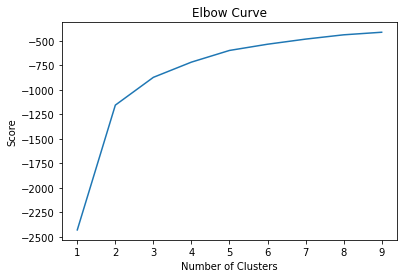

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Since curve does not level off as sharply as in the learning assignment I am going to use the Silhouette Coefficient Method to confirm.

In [38]:
# Importing libraries

import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [39]:
# Code used to identify clusters

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4205763640035951
Silhouette score for k(clusters) = 3 is 0.30939595288327976
Silhouette score for k(clusters) = 4 is 0.2969914696666522
Silhouette score for k(clusters) = 5 is 0.29093278115463456
Silhouette score for k(clusters) = 6 is 0.2745404812818449
Silhouette score for k(clusters) = 7 is 0.26504753572304734
Silhouette score for k(clusters) = 8 is 0.26498995751461957
Silhouette score for k(clusters) = 9 is 0.25434592605555045
Silhouette score for k(clusters) = 10 is 0.23862502047305692
Silhouette score for k(clusters) = 11 is 0.23893171201622881
Silhouette score for k(clusters) = 12 is 0.22360823009184816


### 04 & 5. Determining number of clusters and the k-means algorithm (shown above)

#### Max Silhouette Score as k = 2, thus 2 clusters is the right option.

### 06. New column

In [40]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2)

In [41]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=2)

In [42]:
# Create new column

df['clusters'] = kmeans.fit_predict(df)

C:\Users\caden\AppData\Local\Temp\ipykernel_17008\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [43]:
df.head()

,Score,Economy,Social Support,Health,Freedom,Trust,Generosity,Dystopia Residual,clusters
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,1
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,1
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,1
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,1
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,1


In [44]:
df['clusters'].value_counts()

0    629
1    600
Name: clusters, dtype: int64

### 07. Visualizations

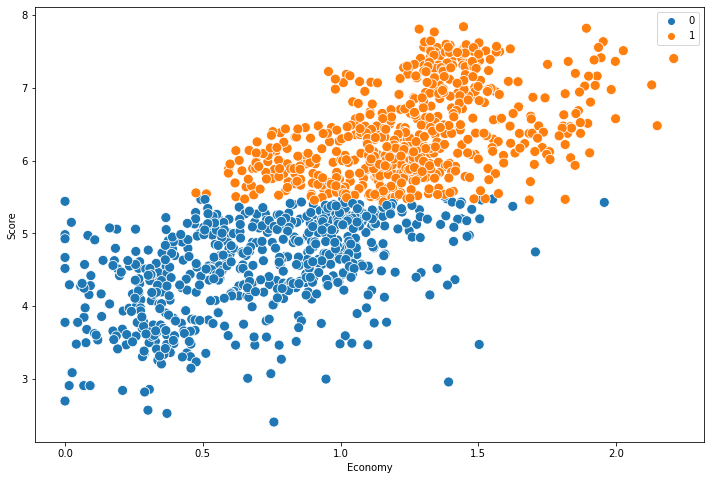

In [45]:
# Plotting the clusters for the "Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy'], y=df['Score'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points I want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

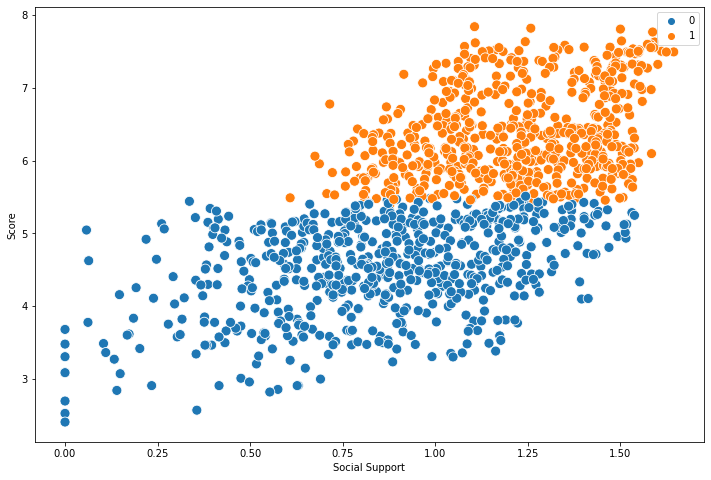

In [46]:
# Plot the clusters for the "Social Support" and "Score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social Support'], y=df['Score'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('Social Support') 
plt.ylabel('Score') 
plt.show()

### 08. Making sense of the clusters

#### The clusters in both charts are seperated by score, both seperating around the score of 5.5. With this, you could conclude that countries with a happiness score above 5.5 are considered to be the most happy, and countries with scores under this would be considered the least happy; countries with a score of 5.5 would be considered to have average happiness. It is worth noting that having a high Economy or Social Support score does not automatically mean a country will be most happy overall, and the same is said about low scores in these catergories not automatically equating to low happiness scores.

### 09. Descriptive Stats

In [47]:
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

C:\Users\caden\AppData\Local\Temp\ipykernel_17008\727457947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 1, 'cluster'] = 'orange'


In [48]:
# Calculating stats

df.groupby('cluster').agg({'Score':['mean', 'median'], 'Economy':['mean', 'median'], 'Social Support':['mean', 'median'], 'Health':['mean', 'median'], 'Freedom':['mean', 'median'], 'Trust':['mean', 'median'], 'Generosity':['mean', 'median'], 'Dystopia Residual':['mean', 'median']})

Score          Economy        Social Support           Health  \
             mean median      mean median           mean median      mean   
cluster                                                                     
blue     4.527857  4.608  0.701054  0.715       0.856016  0.871  0.460455   
orange   6.373698  6.259  1.262885  1.272       1.218928  1.232  0.762852   

                 Freedom            Trust         Generosity          \
        median      mean median      mean  median       mean  median   
cluster                                                                
blue     0.450  0.371687  0.390  0.102749  0.0860   0.203097  0.1920   
orange   0.772  0.513577  0.536  0.160107  0.1175   0.200027  0.1765   

        Dystopia Residual         
                     mean median  
cluster                           
blue             1.832784  1.801  
orange           2.255333  2.231

#### Since the clusters reflect two groups, those with a Happiness score above 5.5 and those with one below that, the results really just confirm this. In the blue group we see lowers scores in all categories and higher scores in the orange group.

### 10. Propose what these results could be useful for in future steps of an analytics pipeline

#### After such findings, these stats could be used to determine recommendations. With my particular data set, I could use these stats to quickly determine which cluster a country would fall into just by looking at one variable's score.

# End